# GENERAL DATA PRE-PROCESSING TECHNIQUES 

In [37]:
import sklearn

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt

import datetime

# PART 2

In [86]:
diabetes = pd.read_csv('diabetes.csv')

diabetes.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72.000000,35,155.548223,33.6,0.627,50,1
1,1,85,66.000000,29,155.548223,0.0,0.351,31,0
2,8,183,64.000000,32,155.548223,23.3,0.672,32,1
3,1,0,66.000000,23,0.000000,28.1,0.167,21,0
4,0,137,0.000000,0,168.000000,43.1,2.288,33,1
5,5,116,74.000000,32,155.548223,25.6,0.201,30,0
6,3,78,50.000000,32,88.000000,31.0,0.248,26,1
7,10,115,72.405184,32,155.548223,35.3,0.134,29,0
8,2,197,70.000000,45,543.000000,30.5,0.158,53,1
9,8,125,96.000000,32,155.548223,32.0,0.232,54,1


In [3]:
diabetes.shape

(768, 9)

In [4]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(4), int64(5)
memory usage: 54.1 KB


In [5]:
diabetes.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.834635,3.371790,0.000,1.00000,3.000000,6.000000,17.00
Glucose,768.0,121.251302,31.342631,0.000,99.00000,117.000000,140.250000,199.00
BloodPressure,768.0,72.235913,12.577375,0.000,64.00000,72.000000,80.000000,122.00
SkinThickness,768.0,29.907552,9.015013,0.000,25.00000,32.000000,32.000000,99.00
Insulin,768.0,155.020754,85.545351,0.000,120.00000,155.548223,155.548223,846.00
BMI,768.0,32.313802,7.155555,0.000,27.50000,32.000000,36.500000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.372500,0.626250,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.000000,41.000000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.000000,1.000000,1.00


In [6]:
#Here we can see that for Pregnancies minimum value is 0. 
#For Pregnancies it is possible to have Zero occurance, 
# but Glucose, Blood Pressure, Skin Thickness, Insulin and BMI it is NOT possible.
# So that means these values are missing values.

In [7]:
#Replace 0 values with NaN

diabetes['Glucose'].replace(0, np.nan, inplace= True)
diabetes['BloodPressure'].replace(0, np.nan, inplace= True)
diabetes['SkinThickness'].replace(0, np.nan, inplace= True)
diabetes['Insulin'].replace(0, np.nan, inplace= True)
diabetes['BMI'].replace(0, np.nan, inplace= True)

In [8]:
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     3
BloodPressure               2
SkinThickness               2
Insulin                     3
BMI                         3
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
### Univariate feature imputation
#### SimpleImputer

from sklearn.impute import SimpleImputer

In [10]:
#### Here Strategy = 'most_frequent' which means it will replace missing using the most frequent value in the column. 

imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

imp.fit(diabetes['SkinThickness'].values.reshape(-1, 1))

diabetes['SkinThickness'] = imp.transform(diabetes['SkinThickness'].values.reshape(-1, 1))

In [11]:
#Confirm the transformation
diabetes['SkinThickness'].describe()

count    768.000000
mean      29.990885
std        8.884962
min        7.000000
25%       25.000000
50%       32.000000
75%       32.000000
max       99.000000
Name: SkinThickness, dtype: float64

In [12]:
#Confirm the transformation
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     3
BloodPressure               2
SkinThickness               0
Insulin                     3
BMI                         3
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [13]:
#### Here Strategy = 'median' which means it will replace missing values using the median in the column

imp = SimpleImputer(missing_values=np.nan, strategy='median')

imp.fit(diabetes['Glucose'].values.reshape(-1, 1))

diabetes['Glucose'] = imp.transform(diabetes['Glucose'].values.reshape(-1, 1))

In [14]:
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               2
SkinThickness               0
Insulin                     3
BMI                         3
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [15]:
##### Here Strategy = 'mean' which means it will replace missing values using the mean in the column.

imp = SimpleImputer(missing_values=np.nan, strategy='mean')

imp.fit(diabetes['BloodPressure'].values.reshape(-1, 1))

diabetes['BloodPressure'] = imp.transform(diabetes['BloodPressure'].values.reshape(-1, 1))

In [16]:
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     3
BMI                         3
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [17]:
##### Here Strategy = 'CONSTANT' which means it will replace missing values using number 32.

imp = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=32)

imp.fit(diabetes['BMI'].values.reshape(-1, 1))

diabetes['BMI'] = imp.transform(diabetes['BMI'].values.reshape(-1, 1))

In [18]:
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     3
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [19]:
##### Here Strategy = 'mean' which means it will replace missing values using the mean in the column.

imp = SimpleImputer(missing_values=np.nan, strategy='mean')

imp.fit(diabetes['Insulin'].values.reshape(-1, 1))

diabetes['Insulin'] = imp.transform(diabetes['Insulin'].values.reshape(-1, 1))

In [20]:
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [21]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.834635,121.708333,72.424519,29.990885,155.628679,32.438802,0.471876,33.240885,0.348958
std,3.371790,30.409175,12.022832,8.884962,84.992019,6.863130,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,100.000000,64.000000,25.000000,122.000000,27.575000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.405184,32.000000,155.548223,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,155.548223,36.500000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [22]:
#SAVE THE FILE IN A CSV FORMAT

diabetes.to_csv('diabetes_processed.csv', index=False)

# Multivariate feature imputation

In [28]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [33]:
imp = IterativeImputer(max_iter=100, random_state=0)

In [34]:
features = [[4, 2, 1], 
            [24, 12, 6], 
            [8, np.nan, 2], 
            [28, 14, 7], 
            [32, 16, np.nan], 
            [600, 300, 150], 
            [np.nan, 60, 30], 
            [np.nan, np.nan, 1]]

In [35]:
imp.fit(features)

IterativeImputer(add_indicator=False, estimator=None,
                 imputation_order='ascending', initial_strategy='mean',
                 max_iter=100, max_value=None, min_value=None,
                 missing_values=nan, n_nearest_features=None, random_state=0,
                 sample_posterior=False, skip_complete=False, tol=0.001,
                 verbose=0)

In [36]:
imp.transform(features)

array([[  4.        ,   2.        ,   1.        ],
       [ 24.        ,  12.        ,   6.        ],
       [  8.        ,   3.99966006,   2.        ],
       [ 28.        ,  14.        ,   7.        ],
       [ 32.        ,  16.        ,   7.92735309],
       [600.        , 300.        , 150.        ],
       [120.00314828,  60.        ,  30.        ],
       [  5.58961598,   2.79614871,   1.        ]])

By fitting the model it understand that each value in a row is half of the previous value 
so now if we will give some 2D array which contains NaN values, it is fill the values according to the pattern it learned
We can see that for two NaN values it is not as accurate as for one NaN value

In [284]:
X_test = [[np.nan, 24, 12], 
          [36, np.nan, np.nan], 
          [100, np.nan, 25], 
          [np.nan, 6, 3],
          [np.nan, 8, np.nan]]

In [282]:
imp.fit(X_test)

IterativeImputer(max_iter=100, random_state=0)

In [285]:
imp.transform(X_test)

array([[ 77.70614278,  24.        ,  12.        ],
       [ 36.        , -24.57843037, -12.30555339],
       [100.        ,  49.96362868,  25.        ],
       [ 62.25464461,   6.        ,   3.        ],
       [ 63.9707033 ,   8.        ,   3.99774622]])

In [96]:
diabetes = pd.read_csv('diabetesmissing.csv')

diabetes.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.000000,35.0,155.548223,33.6,0.627,50.0,1
1,1.0,85.0,66.000000,29.0,155.548223,0.0,0.351,31.0,0
2,8.0,183.0,64.000000,32.0,NaN,23.3,0.672,32.0,1
3,1.0,0.0,66.000000,23.0,0.000000,28.1,0.167,21.0,0
4,0.0,137.0,0.000000,0.0,168.000000,43.1,NaN,33.0,1
5,5.0,116.0,74.000000,32.0,155.548223,25.6,0.201,30.0,0
6,3.0,78.0,50.000000,32.0,88.000000,31.0,0.248,26.0,1
7,10.0,115.0,72.405184,32.0,155.548223,35.3,0.134,29.0,0
8,2.0,197.0,70.000000,45.0,NaN,30.5,0.158,53.0,1
9,8.0,125.0,96.000000,32.0,155.548223,32.0,0.232,54.0,1


In [97]:
diabetes.isnull().sum()

Pregnancies                  7
Glucose                      8
BloodPressure                2
SkinThickness                2
Insulin                      3
BMI                          3
DiabetesPedigreeFunction    12
Age                          4
Outcome                      0
dtype: int64

In [102]:
#Drop the target variable
diabetes_features = diabetes.drop('Outcome', axis=1)
diabetes_label = diabetes[['Outcome']]

diabetes_features.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,148.0,72.0,35.0,155.548223,33.6,0.627,50.0
1,1.0,85.0,66.0,29.0,155.548223,0.0,0.351,31.0
2,8.0,183.0,64.0,32.0,NaN,23.3,0.672,32.0
3,1.0,0.0,66.0,23.0,0.000000,28.1,0.167,21.0
4,0.0,137.0,0.0,0.0,168.000000,43.1,NaN,33.0


In [103]:
diabetes_label

,Outcome
0,1
1,0
2,1
3,0
4,1
...,...
763,0
764,0
765,0
766,1


In [104]:
imp = IterativeImputer(max_iter=10000, random_state=0)

In [105]:
imp.fit(diabetes_features)

IterativeImputer(add_indicator=False, estimator=None,
                 imputation_order='ascending', initial_strategy='mean',
                 max_iter=10000, max_value=None, min_value=None,
                 missing_values=nan, n_nearest_features=None, random_state=0,
                 sample_posterior=False, skip_complete=False, tol=0.001,
                 verbose=0)

In [106]:
diabetes_features_arr = imp.transform(diabetes_features)

In [107]:
diabetes_features_arr.shape

(768, 8)

In [108]:
diabetes_features_arr

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.   ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [50]:
#Apply the transformation on the diabetes_features columns
diabetes_features = pd.DataFrame(diabetes_features_arr, columns=diabetes_features.columns)

diabetes_features.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,148.0,72.0,35.0,155.548223,33.6,0.627000,50.0
1,1.0,85.0,66.0,29.0,155.548223,0.0,0.351000,31.0
2,8.0,183.0,64.0,32.0,217.041664,23.3,0.672000,32.0
3,1.0,0.0,66.0,23.0,0.000000,28.1,0.167000,21.0
4,0.0,137.0,0.0,0.0,168.000000,43.1,0.542136,33.0


In [61]:
#Concat 'outcome' column to the dataset again.
diabetes = pd.concat([diabetes_features, diabetes_label], axis=1)

diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,155.548223,33.6,0.627000,50.0,1
1,1.0,85.0,66.0,29.0,155.548223,0.0,0.351000,31.0,0
2,8.0,183.0,64.0,32.0,217.041664,23.3,0.672000,32.0,1
3,1.0,0.0,66.0,23.0,0.000000,28.1,0.167000,21.0,0
4,0.0,137.0,0.0,0.0,168.000000,43.1,0.542136,33.0,1


In [296]:
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# Missing Indicator

In [62]:
from sklearn.impute import MissingIndicator

In [63]:
features = [[4, 2, 1], 
            [24, 12, 6], 
            [8, 4, 2], 
            [28, 14, 7], 
            [32, 16, -1], 
            [600, 300, 150], 
            [-1, 60, 30], 
            [-1, 4, 1]]

In [64]:
indicator = MissingIndicator(missing_values=-1)

In [65]:
mask_missing_values_only = indicator.fit_transform(features)

mask_missing_values_only

array([[False, False],
       [False, False],
       [False, False],
       [False, False],
       [False,  True],
       [False, False],
       [ True, False],
       [ True, False]])

In [66]:
indicator.features_

array([0, 2], dtype=int64)

In [67]:
indicator = MissingIndicator(missing_values=-1, features="all")

In [68]:
mask_all = indicator.fit_transform(features)

mask_all

array([[False, False, False],
       [False, False, False],
       [False, False, False],
       [False, False, False],
       [False, False,  True],
       [False, False, False],
       [ True, False, False],
       [ True, False, False]])

# Feature Scaling And Transformation

In [321]:
diabetes = pd.read_csv('diabetes_processed.csv')

diabetes.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.000000,35.0,155.548223,33.6,0.627,50,1
1,1,85.0,66.000000,29.0,155.548223,32.0,0.351,31,0
2,8,183.0,64.000000,32.0,155.548223,23.3,0.672,32,1
3,1,117.0,66.000000,23.0,155.628679,28.1,0.167,21,0
4,0,137.0,72.424519,32.0,168.000000,43.1,2.288,33,1
5,5,116.0,74.000000,32.0,155.548223,25.6,0.201,30,0
6,3,78.0,50.000000,32.0,88.000000,31.0,0.248,26,1
7,10,115.0,72.405184,32.0,155.548223,35.3,0.134,29,0
8,2,197.0,70.000000,45.0,543.000000,30.5,0.158,53,1
9,8,125.0,96.000000,32.0,155.548223,32.0,0.232,54,1


In [322]:
features_df = diabetes.drop('Outcome', axis=1)
target_df = diabetes['Outcome']

features_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.000000,35.0,155.548223,33.6,0.627,50
1,1,85.0,66.000000,29.0,155.548223,32.0,0.351,31
2,8,183.0,64.000000,32.0,155.548223,23.3,0.672,32
3,1,117.0,66.000000,23.0,155.628679,28.1,0.167,21
4,0,137.0,72.424519,32.0,168.000000,43.1,2.288,33


In [323]:
target_df.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [324]:
features_df.shape

(768, 8)

In [325]:
target_df.shape

(768,)

### Rescale Data
#### rescaling data between 0 and 1
#### MinMaxScaler
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html

In [328]:
from sklearn.preprocessing import MinMaxScaler

In [329]:
scaler = MinMaxScaler(feature_range=(0, 1))
rescaled_features = scaler.fit_transform(features_df)

In [330]:
rescaled_features.shape

(768, 8)

In [331]:
rescaled_features[0:5]

array([[0.353, 0.671, 0.49 , 0.304, 0.17 , 0.315, 0.234, 0.483],
       [0.059, 0.265, 0.429, 0.239, 0.17 , 0.282, 0.117, 0.167],
       [0.471, 0.897, 0.408, 0.272, 0.17 , 0.104, 0.254, 0.183],
       [0.059, 0.471, 0.429, 0.174, 0.17 , 0.202, 0.038, 0.   ],
       [0.   , 0.6  , 0.494, 0.272, 0.185, 0.509, 0.944, 0.2  ]])

In [332]:
rescaled_features_df = pd.DataFrame(rescaled_features, columns=features_df.columns)

rescaled_features_df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.352941,0.670968,0.489796,0.304348,0.170130,0.314928,0.234415,0.483333
1,0.058824,0.264516,0.428571,0.239130,0.170130,0.282209,0.116567,0.166667
2,0.470588,0.896774,0.408163,0.271739,0.170130,0.104294,0.253629,0.183333
3,0.058824,0.470968,0.428571,0.173913,0.170227,0.202454,0.038002,0.000000
4,0.000000,0.600000,0.494128,0.271739,0.185096,0.509202,0.943638,0.200000


<AxesSubplot:>

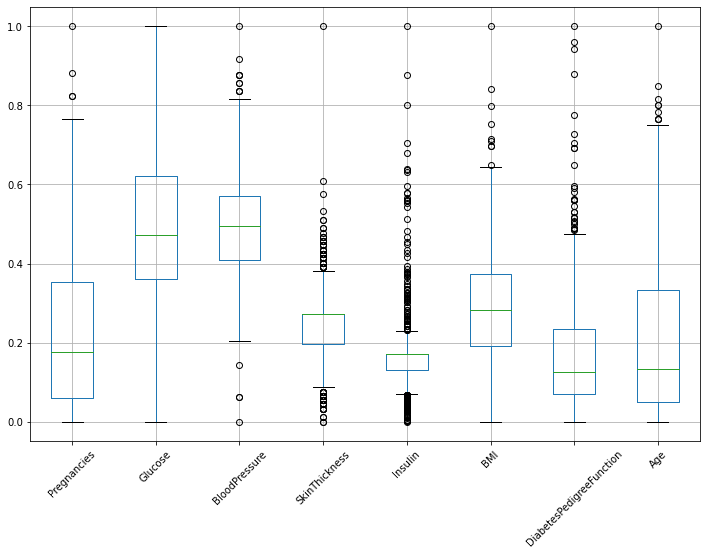

In [333]:
rescaled_features_df.boxplot(figsize=(12, 8), rot=45)


#### Standardize Data
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

Standardization is a useful technique to transform attributes with a Gaussian distribution and differing means and standard deviations to a standard Gaussian distribution with a mean of 0 and a standard deviation of 1.

In [334]:
from sklearn.preprocessing import StandardScaler

In [335]:
scaler = StandardScaler()

scaler = scaler.fit(features_df)

standardized_features = scaler.transform(features_df)

In [336]:
standardized_features[0:5]

array([[ 6.426e-01,  8.652e-01, -3.533e-02,  5.641e-01, -9.472e-04,
         1.693e-01,  4.685e-01,  1.426e+00],
       [-8.412e-01, -1.208e+00, -5.347e-01, -1.116e-01, -9.472e-04,
        -6.398e-02, -3.651e-01, -1.907e-01],
       [ 1.236e+00,  2.017e+00, -7.012e-01,  2.263e-01, -9.472e-04,
        -1.332e+00,  6.044e-01, -1.056e-01],
       [-8.412e-01, -1.549e-01, -5.347e-01, -7.873e-01,  0.000e+00,
        -6.326e-01, -9.208e-01, -1.042e+00],
       [-1.138e+00,  5.032e-01,  0.000e+00,  2.263e-01,  1.457e-01,
         1.554e+00,  5.485e+00, -2.050e-02]])

In [337]:
standardized_features_df = pd.DataFrame(standardized_features, columns=features_df.columns)

standardized_features_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.642619,0.865160,-0.035332,0.564142,-0.000947,0.169304,0.468492,1.425995
1,-0.841239,-1.207933,-0.534708,-0.111597,-0.000947,-0.063978,-0.365061,-0.190672
2,1.236162,2.016878,-0.701167,0.226273,-0.000947,-1.332447,0.604397,-0.105584
3,-0.841239,-0.154934,-0.534708,-0.787335,0.000000,-0.632602,-0.920763,-1.041549
4,-1.138011,0.503191,0.000000,0.226273,0.145653,1.554414,5.484909,-0.020496


<AxesSubplot:>

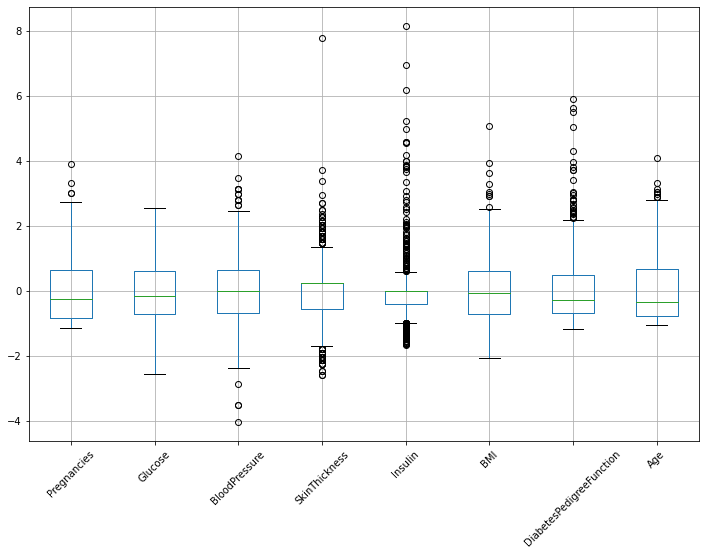

In [338]:
standardized_features_df.boxplot(figsize=(12, 8), rot=45)

# PART 3

#### Logistic Regression
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [354]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [357]:
def build_model(X, Y, test_frac):
    
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=test_frac)
    
    model = LogisticRegression(solver='liblinear').fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    print("Test_score : ", accuracy_score(y_test, y_pred))

In [358]:
# Features transformed with minmax scaler
build_model(rescaled_features, target_df, 0.2)

Test_score :  0.7077922077922078


In [359]:
#Feature transformed with standard scaler
build_model(standardized_features, target_df, 0.2) # The best.

Test_score :  0.7727272727272727


# Discretization - Change a continous variable into discrete form

#### Setting up a 1-D array

In [87]:
X = np.array([-7, 2, -3, -11, 14, 6, 8])

In [89]:
X

array([ -7,   2,  -3, -11,  14,   6,   8])

In [88]:
#Cut the continous value  (numpy array above) into 4 intervals float
categories = pd.cut(X, 4)

categories

[(-11.025, -4.75], (1.5, 7.75], (-4.75, 1.5], (-11.025, -4.75], (7.75, 14.0], (1.5, 7.75], (7.75, 14.0]]
Categories (4, interval[float64, right]): [(-11.025, -4.75] < (-4.75, 1.5] < (1.5, 7.75] < (7.75, 14.0]]

In [364]:
categories.categories

IntervalIndex([(-11.025, -4.75], (-4.75, 1.5], (1.5, 7.75], (7.75, 14.0]],
              closed='right',
              dtype='interval[float64]')

In [365]:
#check the codes that was used for the cutting
categories.codes

array([0, 2, 1, 0, 3, 2, 3], dtype=int8)

#### This time we are setting retbins parameter to True so it will also return the bins

In [90]:
pd.cut(X, 4, retbins=True)

([(-11.025, -4.75], (1.5, 7.75], (-4.75, 1.5], (-11.025, -4.75], (7.75, 14.0], (1.5, 7.75], (7.75, 14.0]]
 Categories (4, interval[float64, right]): [(-11.025, -4.75] < (-4.75, 1.5] < (1.5, 7.75] < (7.75, 14.0]],
 array([-11.025,  -4.75 ,   1.5  ,   7.75 ,  14.   ]))

#### Specifing the labels for the returned bins

In [91]:
marks = np.array([70, 20, 30, 99, 40, 16, 80])

In [92]:
categories, bins = pd.cut(marks, 4, retbins=True, labels=['poor', 'average', 'good', 'excellent'])

In [93]:
categories

['good', 'poor', 'poor', 'excellent', 'average', 'poor', 'excellent']
Categories (4, object): ['poor' < 'average' < 'good' < 'excellent']

In [94]:
categories.categories

Index(['poor', 'average', 'good', 'excellent'], dtype='object')

In [95]:
#Check the cut bins ranges
bins

array([15.917, 36.75 , 57.5  , 78.25 , 99.   ])

#### Passing a Series as an input returns a Series with mapping value

In [ ]:
df = pd.Series(marks, index = [1, 2, 3, 4, 5, 6, 7])

df

In [ ]:
categories, bins = pd.cut(df, 4, retbins=True)

In [ ]:
categories

In [ ]:
bins

### KBinsDiscretizer
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.KBinsDiscretizer.html

In [109]:
from sklearn.preprocessing import KBinsDiscretizer

#### Setting up a 2-D array

In [110]:
marks = [[70], [20], [30], [99], [40], [16], [80]]

#### Here strategy = 'uniform' so all bins in each feature have identical widths.

In [111]:
enc = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='uniform')

In [112]:
enc.fit(marks)

KBinsDiscretizer(encode='ordinal', n_bins=4, strategy='uniform')

In [113]:
enc.transform(marks)

array([[2.],
       [0.],
       [0.],
       [3.],
       [1.],
       [0.],
       [3.]])

#### Edges of each bin

In [114]:
#Examine the bin edges used for the Discretization
enc.bin_edges_

array([array([16.  , 36.75, 57.5 , 78.25, 99.  ])], dtype=object)

# Feature Correlations

In [367]:
!pip install yellowbrick

In [368]:
diabetes = pd.read_csv('diabetes.csv')

diabetes.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72.000000,35,155.548223,33.6,0.627,50,1
1,1,85,66.000000,29,155.548223,0.0,0.351,31,0
2,8,183,64.000000,32,155.548223,23.3,0.672,32,1
3,1,0,66.000000,23,0.000000,28.1,0.167,21,0
4,0,137,0.000000,0,168.000000,43.1,2.288,33,1
5,5,116,74.000000,32,155.548223,25.6,0.201,30,0
6,3,78,50.000000,32,88.000000,31.0,0.248,26,1
7,10,115,72.405184,32,155.548223,35.3,0.134,29,0
8,2,197,70.000000,45,543.000000,30.5,0.158,53,1
9,8,125,96.000000,32,155.548223,32.0,0.232,54,1


### Calculating correlation matrix

In [369]:
diabetes_corr = diabetes.corr()

diabetes_corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.116312,0.212336,0.102609,0.048576,0.017144,-0.033244,0.541351,0.217530
Glucose,0.116312,1.000000,0.193321,0.185110,0.417379,0.212689,0.143627,0.264934,0.477650
BloodPressure,0.212336,0.193321,1.000000,0.217839,0.066496,0.235255,-0.024798,0.306110,0.141327
SkinThickness,0.102609,0.185110,0.217839,1.000000,0.160939,0.475132,0.049718,0.150070,0.214009
Insulin,0.048576,0.417379,0.066496,0.160939,1.000000,0.163018,0.101485,0.132041,0.212644
BMI,0.017144,0.212689,0.235255,0.475132,0.163018,1.000000,0.148903,0.023503,0.299008
DiabetesPedigreeFunction,-0.033244,0.143627,-0.024798,0.049718,0.101485,0.148903,1.000000,0.033561,0.173844
Age,0.541351,0.264934,0.306110,0.150070,0.132041,0.023503,0.033561,1.000000,0.238356
Outcome,0.217530,0.477650,0.141327,0.214009,0.212644,0.299008,0.173844,0.238356,1.000000


<AxesSubplot:>

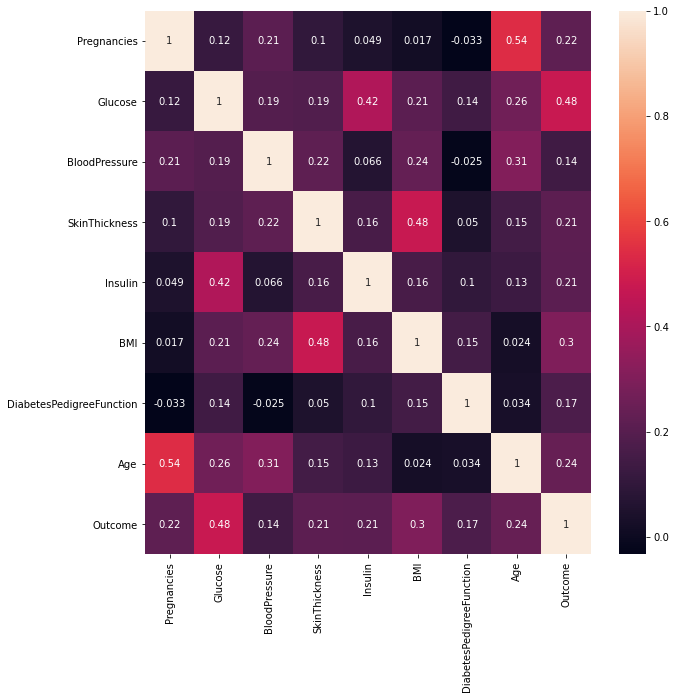

In [372]:
#Plotting HeatMap

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
sns.heatmap(diabetes_corr, annot=True)

##### In the above matrix we can figure out that the correlation score is higher for Insulin and BMI. So now we are going to use FeatureCorrelation function to visualize how 'Insulin', 'BMI', 'BloodPressure', 'DiabetesPedigreeFunction' are correlated with 'Age'.

##### We are taking 4 columns 'Insulin', 'BMI', 'BloodPressure', 'DiabetesPedigreeFunction' as features and 'Age' as label.

In [373]:
X = diabetes[['Insulin', 'BMI', 'BloodPressure', 'DiabetesPedigreeFunction']]

Y = diabetes['Age']

In [374]:
feature_names = X.columns

feature_names

Index(['Insulin', 'BMI', 'BloodPressure', 'DiabetesPedigreeFunction'], dtype='object')

### Visualizing feature correlations
https://www.scikit-yb.org/en/latest/api/target/feature_correlation.html

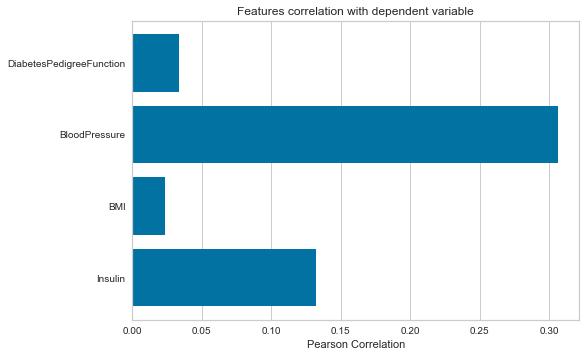

<AxesSubplot:title={'center':'Features correlation with dependent variable'}, xlabel='Pearson Correlation'>

In [375]:
from yellowbrick.target import FeatureCorrelation

visualizer = FeatureCorrelation(labels=feature_names, method='pearson')
visualizer.fit(X, Y)
visualizer.poof()

#### Showing the correlation score

In [376]:
visualizer.scores_

array([0.132, 0.024, 0.306, 0.034])

In [377]:
visualizer.features_

array(['Insulin', 'BMI', 'BloodPressure', 'DiabetesPedigreeFunction'],
      dtype=object)

#### We can see that the scores are same as we got in above correlation matrix/heatmap

In [378]:
score_df = pd.DataFrame({'Feature_names' : visualizer.features_,
                         'Scores' : visualizer.scores_})

score_df

,Feature_names,Scores
0,Insulin,0.132041
1,BMI,0.023503
2,BloodPressure,0.306110
3,DiabetesPedigreeFunction,0.033561


### Split dataset into features and labels

In [379]:
X = diabetes.drop('Outcome', axis=1)

Y = diabetes['Outcome']

In [380]:
feature_names = X.columns

feature_names

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

### Visualizing feature correlations

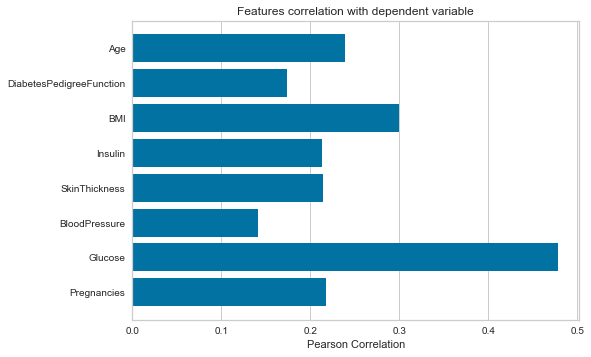

<AxesSubplot:title={'center':'Features correlation with dependent variable'}, xlabel='Pearson Correlation'>

In [381]:
visualizer = FeatureCorrelation(labels=feature_names, method='pearson')
visualizer.fit(X, Y)
visualizer.poof()

In [382]:
visualizer.scores_

array([0.218, 0.478, 0.141, 0.214, 0.213, 0.299, 0.174, 0.238])

In [383]:
visualizer.features_

array(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
       'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'], dtype=object)

In [384]:
score_df = pd.DataFrame({'Feature_names' : visualizer.features_,
                         'Scores' : visualizer.scores_})

score_df

,Feature_names,Scores
0,Pregnancies,0.217530
1,Glucose,0.477650
2,BloodPressure,0.141327
3,SkinThickness,0.214009
4,Insulin,0.212644
5,BMI,0.299008
6,DiabetesPedigreeFunction,0.173844
7,Age,0.238356


In [385]:
feature_names

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

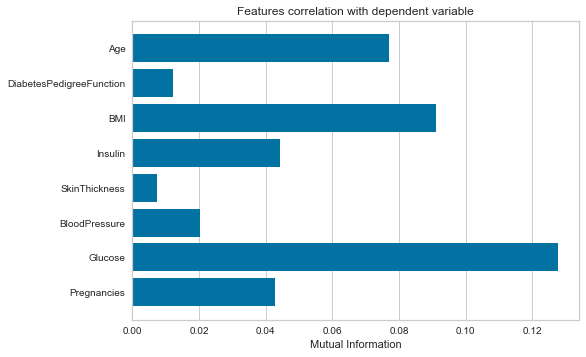

<AxesSubplot:title={'center':'Features correlation with dependent variable'}, xlabel='Mutual Information'>

In [386]:
# Try another method for the visualizer
discrete_features = [False for _ in range(len(feature_names))]
discrete_features[0] = True

visualizer = FeatureCorrelation(method='mutual_info-classification',
                                labels=feature_names)

visualizer.fit(X, Y, discrete_features=discrete_features, random_state=0)

visualizer.poof()

In [388]:
score_df = pd.DataFrame({'Feature_names' : visualizer.features_,
                         'Scores' : visualizer.scores_})

score_df

,Feature_names,Scores
0,Pregnancies,0.042904
1,Glucose,0.127594
2,BloodPressure,0.020407
3,SkinThickness,0.007263
4,Insulin,0.044190
5,BMI,0.091209
6,DiabetesPedigreeFunction,0.012049
7,Age,0.076876


#### This time we are selecting for which feature we want the feature correlation plot

In [387]:
# Make your choice of columns for the visualizer
feature_to_plot = ['Age', 'BMI', 'Insulin', 'BloodPressure', 'Glucose']

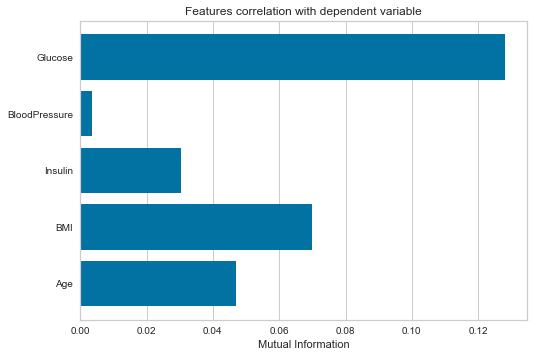

<AxesSubplot:title={'center':'Features correlation with dependent variable'}, xlabel='Mutual Information'>

In [389]:
visualizer = FeatureCorrelation(method='mutual_info-classification',
                                feature_names=feature_to_plot)

visualizer.fit(X, Y, random_state=0)

visualizer.poof()

#### Here we want features in sorted form

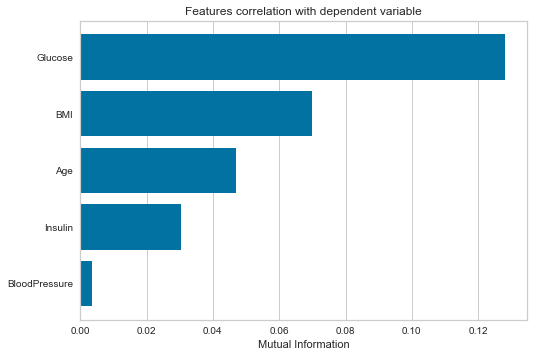

<AxesSubplot:title={'center':'Features correlation with dependent variable'}, xlabel='Mutual Information'>

In [391]:
visualizer = FeatureCorrelation(method='mutual_info-classification',
                                feature_names=feature_to_plot, sort=True)

visualizer.fit(X, Y, random_state=0)
visualizer.poof()

In [392]:
score_df = pd.DataFrame({'Feature_names' : visualizer.features_,
                         'Scores' : visualizer.scores_})

score_df

,Feature_names,Scores
0,BloodPressure,0.003432
1,Insulin,0.030271
2,Age,0.046833
3,BMI,0.069942
4,Glucose,0.128194


# Handling Multicollinearity


In [118]:
automobile = pd.read_csv('cars_processed.csv')

automobile.head(5)

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Origin,Age
0,18.000000,8,307.0,130,3504,12.0,US,51
1,16.000000,8,304.0,150,3433,12.0,US,51
2,17.000000,8,302.0,140,3449,10.5,US,51
3,14.000000,8,454.0,220,4354,9.0,US,51
4,23.551429,8,440.0,215,4312,8.5,US,51


In [119]:
automobile.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Age
count,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000
mean,23.672514,5.410853,192.184755,103.645995,2965.387597,15.573643,44.917313
std,7.736579,1.667795,103.703706,38.128651,846.332848,2.746260,3.668715
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,39.000000
25%,17.600000,4.000000,102.500000,75.000000,2221.500000,13.900000,42.000000
50%,23.200000,4.000000,146.000000,92.000000,2790.000000,15.500000,45.000000
75%,29.000000,6.000000,260.000000,121.000000,3589.500000,17.050000,48.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,51.000000


#### Preprocessing the features

In [120]:
from sklearn import preprocessing

automobile[['Cylinders']] = preprocessing.scale(automobile[['Cylinders']].astype('float64'))
automobile[['Displacement']] = preprocessing.scale(automobile[['Displacement']].astype('float64'))
automobile[['Horsepower']] = preprocessing.scale(automobile[['Horsepower']].astype('float64'))
automobile[['Weight']] = preprocessing.scale(automobile[['Weight']].astype('float64'))
automobile[['Acceleration']] = preprocessing.scale(automobile[['Acceleration']].astype('float64'))
automobile[['Age']] = preprocessing.scale(automobile[['Age']].astype('float64'))

In [121]:
automobile.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Age
count,387.000000,3.870000e+02,3.870000e+02,3.870000e+02,3.870000e+02,3.870000e+02,3.870000e+02
mean,23.672514,1.095879e-16,8.778508e-17,-1.061454e-17,-2.008155e-18,2.662240e-16,5.817913e-16
std,7.736579,1.001294e+00,1.001294e+00,1.001294e+00,1.001294e+00,1.001294e+00,1.001294e+00
min,9.000000,-1.447404e+00,-1.199046e+00,-1.513838e+00,-1.600007e+00,-2.761372e+00,-1.615000e+00
25%,17.600000,-8.470340e-01,-8.659368e-01,-7.522710e-01,-8.800918e-01,-6.102152e-01,-7.962160e-01
50%,23.200000,-8.470340e-01,-4.459295e-01,-3.058349e-01,-2.075007e-01,-2.685060e-02,2.256768e-02
75%,29.000000,3.537065e-01,6.547792e-01,4.557326e-01,7.383860e-01,5.382839e-01,8.413513e-01
max,46.600000,1.554447e+00,2.537570e+00,3.318176e+00,2.572779e+00,3.363956e+00,1.660135e+00


In [122]:
automobile.shape

(387, 8)

### Building a regression model

In [123]:
automobile.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Origin,Age
0,18.000000,1.554447,1.108580,0.692081,0.637231,-1.302961,US,1.660135
1,16.000000,1.554447,1.079614,1.217300,0.553231,-1.302961,US,1.660135
2,17.000000,1.554447,1.060303,0.954691,0.572161,-1.849865,US,1.660135
3,14.000000,1.554447,2.527915,3.055566,1.642864,-2.396769,US,1.660135
4,23.551429,1.554447,2.392740,2.924262,1.593174,-2.579071,US,1.660135


In [124]:
from sklearn.model_selection import train_test_split

In [125]:
X = automobile.drop(['MPG', 'Origin'], axis=1)
Y = automobile['MPG']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [126]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression(normalize=True).fit(x_train, y_train)

In [127]:
print("Training_score : " , linear_model.score(x_train, y_train))

Training_score :  0.7912698567086337


In [128]:
y_pred = linear_model.predict(x_test)

In [129]:
from sklearn.metrics import r2_score

print("Testing_score : ", r2_score(y_test, y_pred))

Testing_score :  0.7588315708951936


##### Calculating the adjusted r_2 value

In [130]:
def adjusted_r2(r_square, labels, features):
    
    adj_r_square = 1 - ((1 - r_square) * (len(labels) - 1)) / (len(labels) - features.shape[1] - 1)
    
    return adj_r_square

In [131]:
print("Adjusted_r2_score : ", adjusted_r2(r2_score(y_test, y_pred), y_test, x_test))

Adjusted_r2_score :  0.7384511402666184


### Showing correlation matrix for multicollinearity detection
Higher the correlation value means features are highly correlated

In [132]:
features_corr = X.corr()

features_corr

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Age
Cylinders,1.000000,0.922633,0.811466,0.873029,-0.458161,0.321850
Displacement,0.922633,1.000000,0.894199,0.932822,-0.526901,0.357047
Horsepower,0.811466,0.894199,1.000000,0.863388,-0.670920,0.404458
Weight,0.873029,0.932822,0.863388,1.000000,-0.397181,0.299049
Acceleration,-0.458161,-0.526901,-0.670920,-0.397181,1.000000,-0.292705
Age,0.321850,0.357047,0.404458,0.299049,-0.292705,1.000000


In [134]:
#### Checking for correlation value greater than 0.8
#Here we can figure out that cylinders, displacement, horsepower and weight are correlated

In [135]:
abs(features_corr) > 0.8

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Age
Cylinders,True,True,True,True,False,False
Displacement,True,True,True,True,False,False
Horsepower,True,True,True,True,False,False
Weight,True,True,True,True,False,False
Acceleration,False,False,False,False,True,False
Age,False,False,False,False,False,True


#### So we are dropping 'cylinders', 'displacement', 'weight' columns

In [136]:
trimmed_features_df = X.drop(['Cylinders', 'Displacement', 'Weight'], axis=1)

In [137]:
#### After dropping the columns we can see now correlation value is less than 0.75 

trimmed_features_corr = trimmed_features_df.corr()

trimmed_features_corr

,Horsepower,Acceleration,Age
Horsepower,1.000000,-0.670920,0.404458
Acceleration,-0.670920,1.000000,-0.292705
Age,0.404458,-0.292705,1.000000


In [138]:
abs(trimmed_features_corr) > 0.8

,Horsepower,Acceleration,Age
Horsepower,True,False,False
Acceleration,False,True,False
Age,False,False,True


### Calculating VIF score for multicollinearity detection
* 1 = not correlated.
* Between 1 and 5 = moderately correlated.
* Greater than 5 = highly correlated

In [139]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [140]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

In [141]:
vif["features"] = X.columns

In [142]:
vif.round(2)

,VIF Factor,features
0,6.84,Cylinders
1,16.10,Displacement
2,8.82,Horsepower
3,10.69,Weight
4,2.49,Acceleration
5,1.22,Age


#### Dropping top 4 highest VIF factor column

In [143]:
X = X.drop(['Displacement', 'Weight'], axis=1)

In [144]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

In [145]:
vif["features"] = X.columns

In [146]:
vif.round(2)

,VIF Factor,features
0,3.05,Cylinders
1,4.56,Horsepower
2,1.90,Acceleration
3,1.20,Age


#### Here we are dropping that features which are causing multicollinearity and then training the model
Here we can see the difference between training, testing and adjusted r2 scores between the models that we build in the starting of the demo and this model.

In [147]:
X = automobile.drop(['MPG', 'Displacement', 'Weight', 'Origin'], axis=1)
Y = automobile['MPG']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [148]:
linear_model = LinearRegression(normalize=True).fit(x_train, y_train)

In [149]:
print("Training_score : " , linear_model.score(x_train, y_train))

Training_score :  0.7399027640556803


In [150]:
y_pred = linear_model.predict(x_test)

In [151]:
print("Testing_score : ", r2_score(y_test, y_pred))

Testing_score :  0.6497477207230488


In [152]:
print("Adjusted_r2_score : ", adjusted_r2(r2_score(y_test, y_pred), y_test, x_test))

Adjusted_r2_score :  0.6305558150092432
